## Linear Regression Example

In [3]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/var/folders/nb/kc8rjsz56ml8nwz8xnxkcymw0000gn/T/ipykernel_44382/3376775036.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Loadading the California Housing Dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [5]:
# Inspecting the Dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Inspecting the Dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# For this example, we'll use 'MedInc' (median income) as the feature
X = df[['MedInc']].values
y = df['MedHouseVal'].values

In [5]:
# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Creating and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Evaluating the Model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.7091157771765548
R^2 Score: 0.45885918903846656


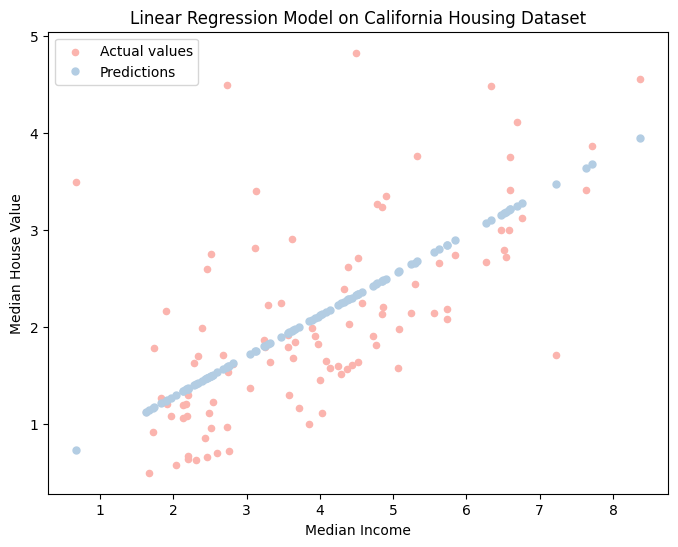

In [22]:
# Ploting Results with Adjustments
# Sample a subset of the test set for clearer plotting, if needed
sample_size = 100  # Adjust as needed for clarity
indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
X_test_sampled = X_test[indices]
y_test_sampled = y_test[indices]
y_pred_sampled = y_pred[indices]

plt.figure(figsize=(8, 6))  # Adjust for better visualization
plt.scatter(X_test_sampled, y_test_sampled, color='#fbb4ae', s=20, label='Actual values')  # Pastel color, smaller points
plt.plot(X_test_sampled, y_pred_sampled, 'o', color='#b3cde3', linewidth=2, label='Predictions', markersize=5)  # Pastel color, smaller markers
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression Model on California Housing Dataset')
plt.legend()
plt.show()

## Multiple Linear Regression

In [15]:
X = df[['MedInc','HouseAge','AveRooms','Population','Latitude','Longitude']].values
y = df['MedHouseVal'].values

In [16]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Creating and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.5485197776358754
R^2 Score: 0.5814132940601403


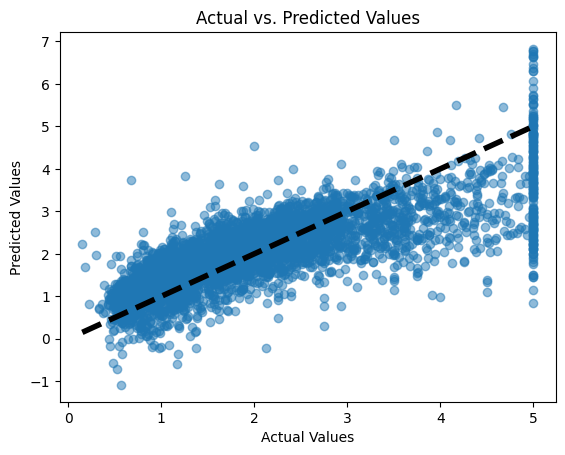

In [20]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

## Analysing the Coefficients

In [24]:
X = df[['MedInc','HouseAge','AveRooms','Population','Latitude','Longitude']]
feature_names = X.columns

coefficients = model.coef_

# Displaying coefficients along with feature names
feature_importance = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])
feature_importance = feature_importance.abs().sort_values(by='Coefficient', ascending=False)
print(feature_importance)

            Coefficient
Longitude      0.466508
Latitude       0.459896
MedInc         0.371079
AveRooms       0.019334
HouseAge       0.009628
Population     0.000006


- **Longitude** and **Latitude**: These features have the largest coefficients, suggesting that geographic location is a very strong predictor of housing prices, which makes intuitive sense as real estate prices are heavily influenced by location.

- **Median Income**: This has the next largest coefficient and is a significant predictor of housing prices, implying that higher income is associated with higher housing values.

- **Average Rooms**: This coefficient is positive but relatively small, suggesting that the number of rooms has a positive association with house value but not as strong as the location or income.

- **House Age**: This has a small positive coefficient, indicating a slight association with the median house value, perhaps reflecting the value placed on newer homes or the scarcity of older homes in certain areas.

- **Population**: The coefficient here is close to zero, suggesting that the population has a negligible effect on the median house value in this model.

The scale of the variables can affect the coefficient size; hence, looking at standardized coefficients or further feature importance analysis might be helpful for a complete understanding of the model.